In [44]:
from io import StringIO
from pathlib import Path
import geopandas as gpd

In [36]:
dataset='Local_Authority_Districts_May_2024_Boundaries__UK_BSC'
url = f'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/{dataset}/FeatureServer/0/query?where=1%3D1&outFields=LAD24CD,LAD24NM,LAD24NMW&outSR=4326&f=geojson'
print(url)
lad_geojson = '../working/lad22.gejoson'

https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Local_Authority_Districts_May_2024_Boundaries__UK_BSC/FeatureServer/0/query?where=1%3D1&outFields=LAD24CD,LAD24NM,LAD24NMW&outSR=4326&f=geojson


In [50]:
import requests
with requests.get(url) as r:
    df = gpd.read_file(StringIO(r.text))

,LAD24CD,LAD24NM,LAD24NMW,geometry
0,E06000001,Hartlepool,,"MULTIPOLYGON (((-1.24194 54.72272, -1.24252 54..."
1,E06000002,Middlesbrough,,"MULTIPOLYGON (((-1.23083 54.58583, -1.22982 54..."
2,E06000003,Redcar and Cleveland,,"POLYGON ((-0.79334 54.55831, -0.79879 54.55562..."
3,E06000004,Stockton-on-Tees,,"MULTIPOLYGON (((-1.20074 54.62303, -1.20406 54..."
4,E06000005,Darlington,,"POLYGON ((-1.43836 54.59508, -1.43137 54.59536..."
...,...,...,...,...
356,W06000020,Torfaen,Torfaen,"POLYGON ((-2.95891 51.62878, -2.96379 51.62517..."
357,W06000021,Monmouthshire,Sir Fynwy,"POLYGON ((-2.6504 51.82612, -2.65016 51.82411,..."
358,W06000022,Newport,Casnewydd,"POLYGON ((-2.82136 51.55419, -2.82164 51.55407..."
359,W06000023,Powys,Powys,"POLYGON ((-3.1475 52.89017, -3.13552 52.88501,..."


<Axes: >

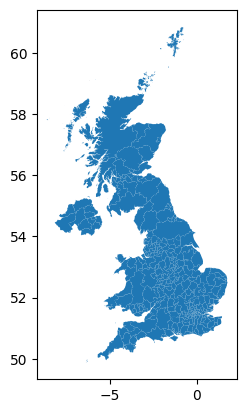

In [51]:
df.plot()

In [54]:
ROOT = Path('..')

df.set_crs(None, allow_override=True).to_file(ROOT / 'static/autoload-data/lad.geojson', coordinate_precision=5)

/home/giles/.local/share/virtualenvs/social-value-data-explorer-RFFikNqF/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [7]:
df.to_parquet(ROOT / 'static/autoload-data/lad.parquet')